<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-07/blob/main/OverfittingHomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [ ]:
import pandas as pd

df = pd.read_csv('bikes_rent.csv')
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

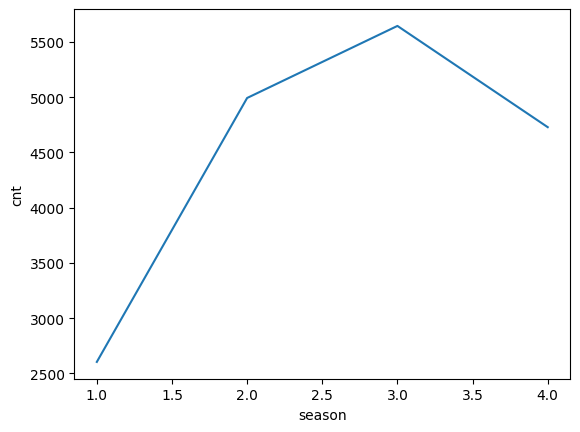

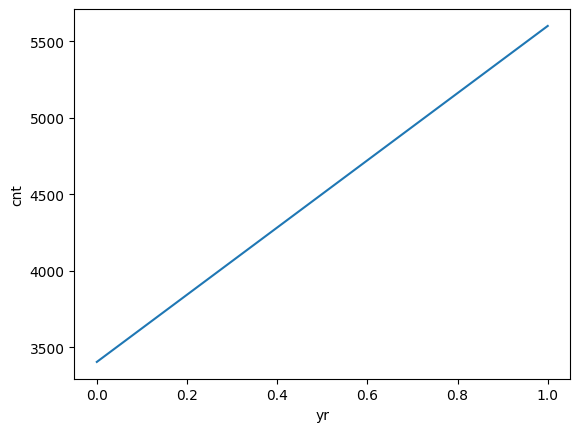

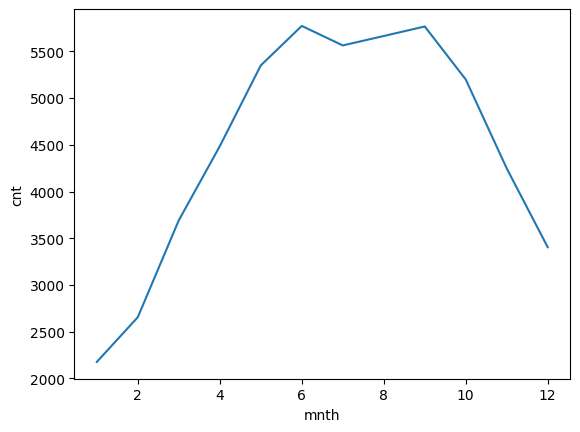

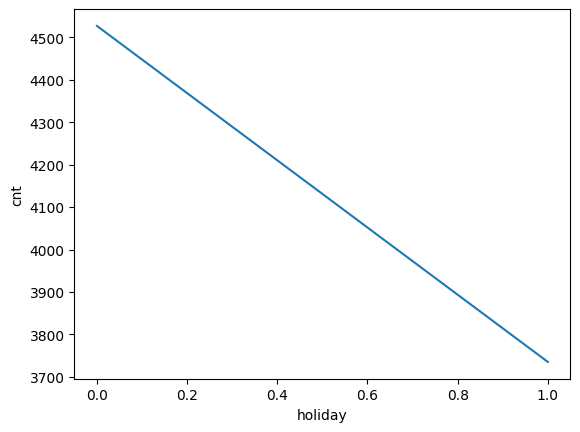

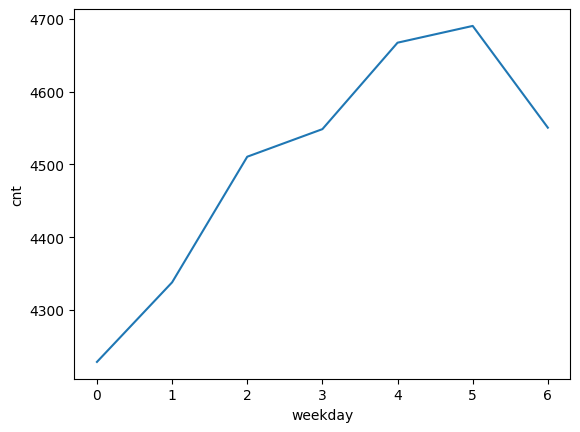

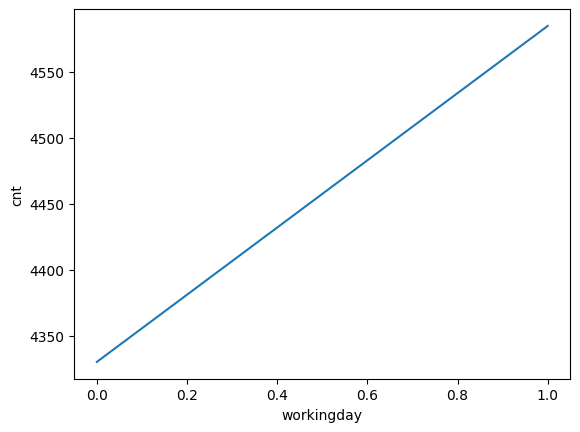

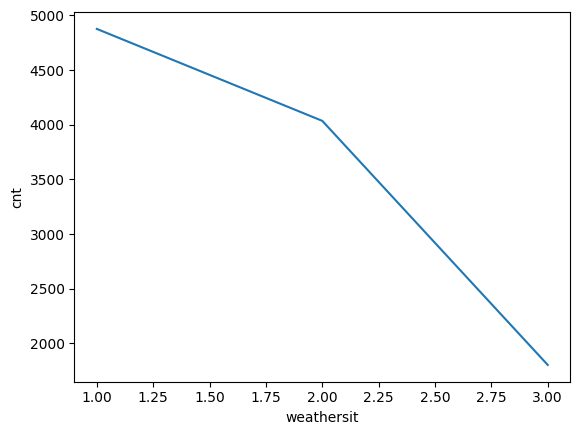

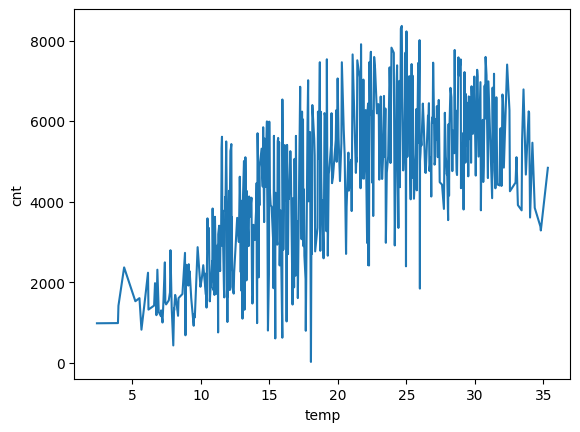

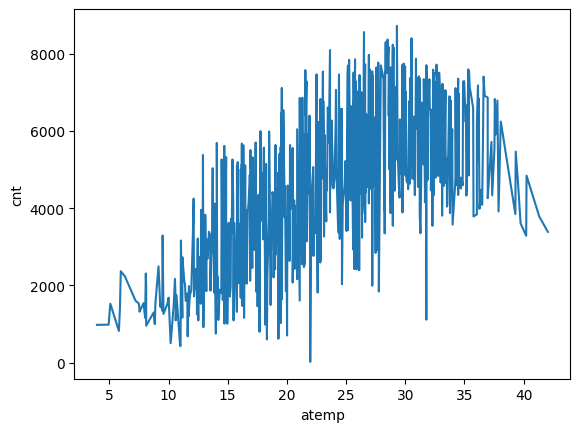

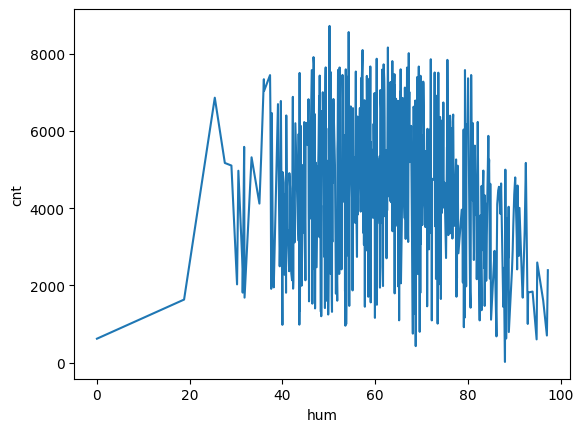

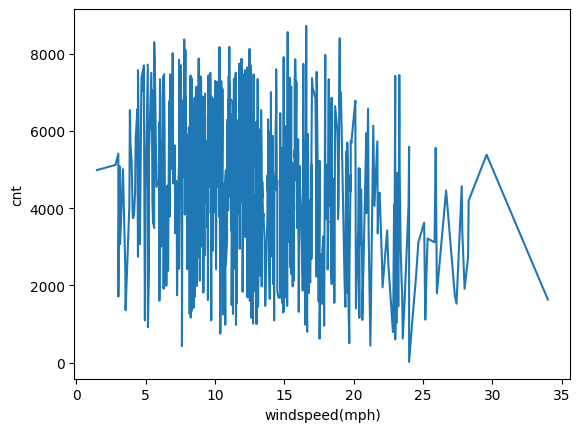

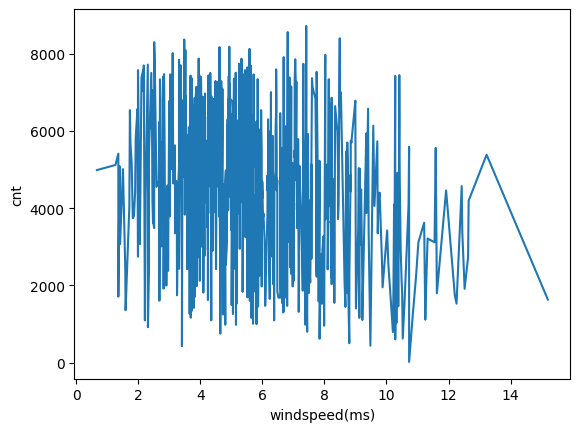

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('bikes_rent.csv')

def dfc(col):
    df.groupby(col)['cnt'].mean().plot(kind='line')
    plt.xlabel(col)
    plt.ylabel('cnt')
    plt.show()

dfc("season")
dfc("yr")
dfc("mnth")
dfc("holiday")
dfc("weekday")
dfc("workingday")
dfc("weathersit")
dfc("temp")
dfc("atemp")
dfc("hum")
dfc("windspeed(mph)")
dfc("windspeed(ms)")

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [ ]:
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

def corr(col):
  print(df['cnt'].corr(df[col]))

corr("season")
corr("yr")
corr("mnth")
corr("holiday")
corr("weekday")
corr("workingday")
corr("weathersit")
corr("temp")
corr("atemp")
corr("hum")
corr("windspeed(mph)")
corr("windspeed(ms)")

print(df.corrwith(df['cnt']))


0.4061003707986365
0.5667097078680865
0.27997711221927124
-0.06834771589248406
0.06744341241063045
0.061156063060520655
-0.2973912388346636
0.6274940090334922
0.6310656998491815
-0.1006585621371552
-0.23454499742167012
-0.23454499742168924
season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

In [ ]:
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

cols = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
corr_matrix = df[cols].corr()
print(corr_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [ ]:
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

print(df[['temp', 'atemp']].mean())
print(df[['windspeed(mph)', "windspeed(ms)"]].mean())

temp     20.310776
atemp    23.717699
dtype: float64
windspeed(mph)    12.762576
windspeed(ms)      5.705220
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [ ]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [ ]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

X = df.drop(columns=["cnt"])
y = df["cnt"]
model = LinearRegression()
model.fit(X, y)
for feature, coef in zip(X.columns, model.coef_):
    print(feature, coef)




season 514.2756689772416
yr 2043.9333206099773
mnth -40.96317631503962
holiday -519.3860417173415
weekday 68.49569506058863
workingday 121.29281595858514
weathersit -606.4542679476724
temp 48.994172947818015
atemp 71.9163310082323
hum -10.230641893838651
windspeed(mph) 2400995993962.544
windspeed(ms) -5371028038579.01


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

X = df.drop(columns=["cnt"])
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = df["cnt"]
model = Lasso(alpha=1)
model.fit(X, y)
for feature, coef in zip(X.columns, model.coef_):
    print(feature, coef)

season 560.6213444295252
yr 1020.1609143570398
mnth -128.81483690588001
holiday -86.21137820853028
weekday 137.44127180565863
workingday 55.249673469681674
weathersit -332.5971816878998
temp 376.6201658583202
atemp 576.9261956681863
hum -144.22727486714857
windspeed(mph) -197.27393505025606
windspeed(ms) -2.8048312954412503e-08


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [ ]:
from sklearn.linear_model import Ridge
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

X = df.drop(columns=["cnt"])
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = df["cnt"]
model = Ridge(alpha=1)
model.fit(X, y)
for feature, coef in zip(X.columns, model.coef_):
    print(feature, coef)

season 563.4462621779589
yr 1019.6441318532164
mnth -131.96008662561016
holiday -86.8055493428942
weekday 138.09913802073558
workingday 55.94131934843982
weathersit -332.5768500621636
temp 386.7403675887003
atemp 566.7166397496413
hum -145.17076794275948
windspeed(mph) -99.32767450061723
windspeed(ms) -99.32767457297814


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [91]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
df = pd.read_csv('bikes_rent.csv')

alphas = np.arange(1, 500, 50)
X = df.drop(columns=["cnt"])
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = df["cnt"]
coefs_lasso = []
coefs_ridge = []
for alpha in alphas:
    lasso = Lasso(alpha)
    lasso.fit(X, y)
    for feature, coef in zip(X.columns, lasso.coef_):
        coefs_lasso.append(coef)
        print(feature, coef)
    print("\n")
    ridge = Ridge(alpha)
    ridge.fit(X, y)
    for feature, coef in zip(X.columns, ridge.coef_):
        coefs_ridge.append(coef)
        print(feature, coef)
    print("\n")

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)
print(coefs_lasso)
print(coefs_ridge)


season 560.6213444295252
yr 1020.1609143570398
mnth -128.81483690588001
holiday -86.21137820853028
weekday 137.44127180565863
workingday 55.249673469681674
weathersit -332.5971816878998
temp 376.6201658583202
atemp 576.9261956681863
hum -144.22727486714857
windspeed(mph) -197.27393505025606
windspeed(ms) -2.8048312954412503e-08


season 563.4462621779589
yr 1019.6441318532164
mnth -131.96008662561016
holiday -86.8055493428942
weekday 138.09913802073558
workingday 55.94131934843982
weathersit -332.5768500621636
temp 386.7403675887003
atemp 566.7166397496413
hum -145.17076794275948
windspeed(mph) -99.32767450061723
windspeed(ms) -99.32767457297814


season 411.2223186914707
yr 977.6596120444754
mnth -0.0
holiday -53.46036969138494
weekday 91.97638095937789
workingday 17.522250805422093
weathersit -318.33562722820614
temp 323.015629375321
atemp 610.4637989669123
hum -91.08749659909786
windspeed(mph) -145.12994857255055
windspeed(ms) -2.297890940298368e-08


season 461.39236158843573
yr 95

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

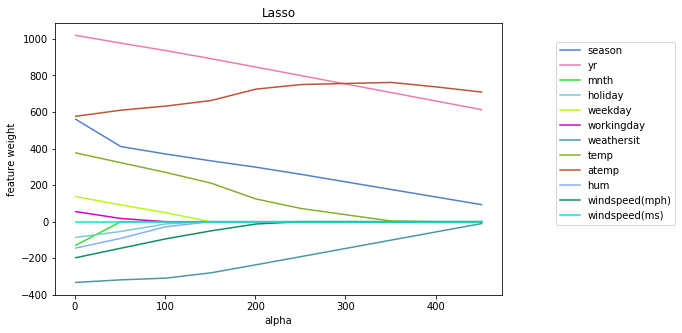

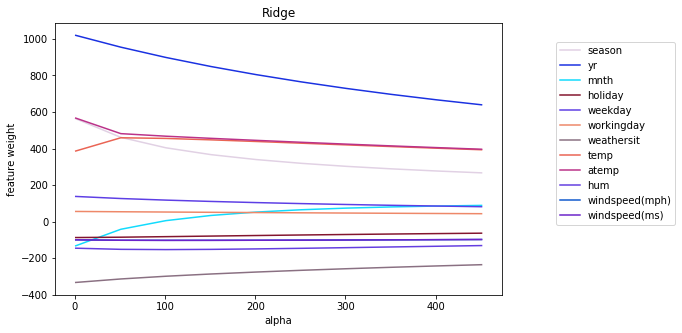

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [66]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = [e[0] for e in data]
    y = [e[1] for e in data]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

У мене не вдалося створити такий код, який б обчислив корректну альфа. Буду щирий, якщо ви підскажете мені це

Alpha = 26
season: 431.78583203980645
yr: 998.2633466501723
mnth: -0.0
holiday: -71.51194799326288
weekday: 113.47474428419497
workingday: 36.84282490004127
weathersit: -323.8967740326196
temp: 348.532862691213
atemp: 599.809340142221
hum: -122.47887664945841
windspeed(mph): -170.54804231840538
windspeed(ms): -2.257464523746138e-08


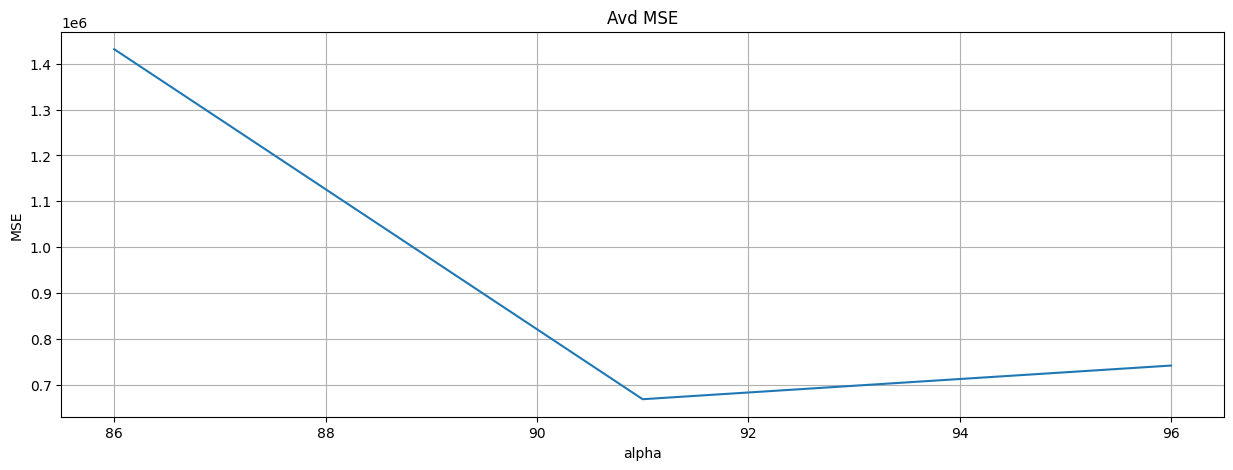

In [99]:
from sklearn.linear_model import LassoCV
import numpy as np

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

mse_mean = np.mean(regressor.mse_path_, axis=0)
data = list(zip(regressor.alphas_, mse_mean))

lasso = model.named_steps["lasso"]
print(f"Alpha = {lasso.alpha_}")
for features, coef in zip(X.columns, regressor.coef_):
  print(f"{features}: {coef}")

create_plot(data, title="Avd MSE", xlabel="alpha", ylabel="MSE")

Alpha = 6

season: 532.018982841
yr: 1015.06022264
mnth: -100.039526144
holiday: -83.2939598753
weekday: 132.504465491
workingday: 51.5570856141
weathersit: -330.55985674
temp: 370.67985503
atemp: 581.396931065
hum: -140.007405501
windspeed(mph): -191.771408471
windspeed(ms): -2.68545418157e-08


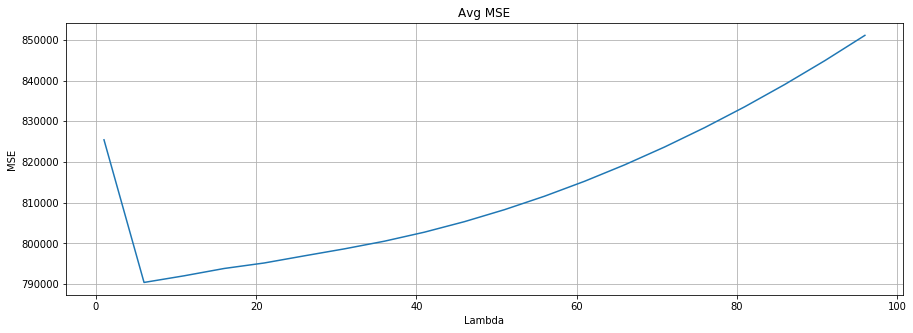

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = # Put your code here

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


In [ ]:
# Put your code here

Alphas with minimum MSE:
Alpha = 41, MSE = 843336.181499
Alpha = 6, MSE = 772598.495628
Alpha = 1, MSE = 745668.605961


На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [ ]:
# ???

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [ ]:
# ???

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.